<a href="https://colab.research.google.com/github/Maksimka9/klustering/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Зависимости

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot
import sklearn
from sklearn import cluster
from sklearn import datasets

In [48]:
# Сформируем тестовый набор данных из 5000 записей, каждая из которых имеет две координаты.
# При этом полученный набор данных будет иметь 4 явно выраженных кластера.
#test_x, test_y = datasets.make_blobs(n_samples = 5000, n_features = 2, centers = 4)

filename = r"https://github.com/Maksimka9/klustering/blob/main/zoo2.csv?raw=true"
df = pd.read_csv(filename, index_col=0)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
animal_name,,,,,,,,,,,,,,,,,
turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
python,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
boa,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,3
adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
crocodile,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3


In [49]:
# Нормализуем данные (среднее значение=0, дисперсия=1)

from sklearn.preprocessing import StandardScaler
standart_df = StandardScaler().fit_transform(df)
standart_df

array([[-0.15430335,  0.        ,  0.        ,  0.        , -0.44095855,
         1.07238053, -0.65828059, -0.88975652,  0.84852814,  0.55048188,
        -0.36273813, -0.44095855,  0.30924429,  1.02353263,  2.75680975,
         1.29903811, -1.27089167],
       [-0.15430335,  0.        ,  0.        ,  0.        , -0.44095855,
        -0.93250481, -0.65828059,  1.12390297,  0.84852814,  0.55048188,
        -0.36273813, -0.44095855,  0.30924429,  1.02353263,  2.75680975,
        -0.76980036, -1.27089167],
       [-0.15430335,  0.        ,  0.        ,  0.        , -0.44095855,
        -0.93250481,  1.51910905,  1.12390297,  0.84852814,  0.55048188,
        -0.36273813, -0.44095855,  0.30924429,  1.02353263,  2.75680975,
         1.29903811, -1.27089167],
       [-0.15430335,  0.        ,  0.        ,  0.        , -0.44095855,
        -0.93250481,  1.51910905,  1.12390297,  0.84852814,  0.55048188,
        -0.36273813, -0.44095855,  0.30924429,  1.02353263, -0.36273813,
        -0.76980036

In [50]:
# Применяем PCA к кластеризованным данным
from sklearn.decomposition import PCA

reduced_df = PCA(n_components=2).fit_transform(standart_df)
reduced_df = pd.DataFrame(reduced_df)
reduced_df

,0,1
0,-1.783185,0.933932
1,-0.907073,2.462406
2,-1.764617,2.989749
3,-0.778783,2.329720
4,-0.907073,2.462406
5,-1.874484,2.029208
6,-1.957701,1.750620
7,-1.874484,2.029208
8,-2.032775,1.696164
9,-2.032775,1.696164


24 2.140046296296296


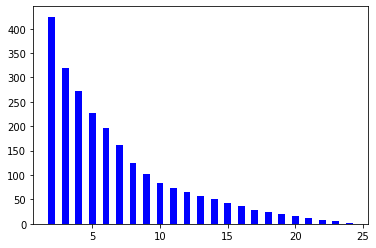

In [51]:
# Теперь запустим алгоритм k-средних, указав число кластеров, которое нам изначально известно

inertia_dict = {}
for k in range(2, 25):
  kmeans = sklearn.cluster.KMeans(n_clusters = k, n_init=9)
  y = kmeans.fit_predict(standart_df)
  transfer_list = {k: kmeans.inertia_}
  inertia_dict.update(transfer_list)
  del(transfer_list)

#Построим гистограмму для всех значений инерции по кластерам

matplotlib.pyplot.bar(inertia_dict.keys(), inertia_dict.values(), width=0.5, color='b')

# Выведем значение инерции (именно оно минимизируется при использовании алгоритма k-средних)

print(min(inertia_dict, key=inertia_dict.get), min(inertia_dict.values()))

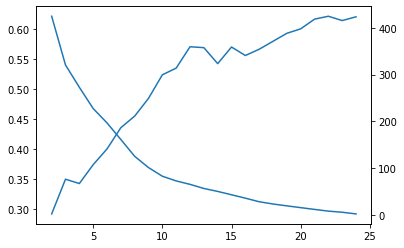

In [69]:
#

from sklearn.metrics import silhouette_score

silhouette_dict = {}
for k in range(2, 25):
  kmeans = sklearn.cluster.KMeans(n_clusters=k, n_init=9)
  y = kmeans.fit_predict(standart_df)
  transfer_list = {k: silhouette_score(standart_df, y)}
  silhouette_dict.update(transfer_list)
  del(transfer_list)

new_df = pd.DataFrame.from_dict(silhouette_dict, orient='index')
new_df1 = pd.DataFrame.from_dict(inertia_dict, orient='index')

figure = matplotlib.figure.Figure()
axis_1 = figure.add_subplot()
axis_1.plot(new_df)
axis_2 = axis_1.twinx()
axis_2.plot(new_df1)
display(figure)
#Построим гистограмму для всех значений силуэта по кластерам
#matplotlib.pyplot.bar(silhouette_dict.keys(), silhouette_dict.values(), width=0.5, color='b')

# Выведем значение силуэта (именно оно минимизируется при использовании алгоритма k-средних)

#print(max(silhouette_dict, key=silhouette_dict.get), max(silhouette_dict.values()))   #print(min(income, key=income.get))


# silhouette_score(x,cluster.labels_)

In [56]:
# делаем кластеризацию вручную на определенном кол-ве кластеров

kmeans = sklearn.cluster.KMeans(n_clusters = 4)
processed_df = kmeans.fit_predict(standart_df)
processed_df

array([3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0],
      dtype=int32)

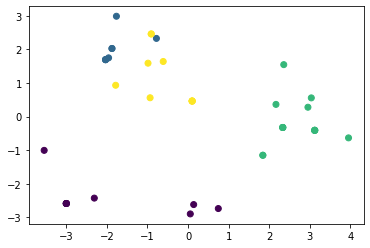

In [57]:
# Отобразим набор данных, используя разные цвета для разных кластеров
matplotlib.pyplot.scatter(reduced_df[0], reduced_df[1], c = processed_df)
matplotlib.pyplot.show()